# Projet : Classification du Diagnostic du Cancer du Sein à l'Aide de Modèles de Machine Learning 

## Question 1 et 2

### Charger le dataset
---

In [73]:
import pandas as pd
data = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data.csv")

In [74]:
df = data.copy()
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


### Explorer ses caractéristiques
---

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- we can observe that we dont have balance between classes :

In [76]:
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


- B = 62% vs M = 37%
- so maybe accuracy as a metric wont be very effective !?

In [77]:
print(df['diagnosis'].value_counts()/len(df['diagnosis']))

diagnosis
B    0.627417
M    0.372583
Name: count, dtype: float64


### Prétraitement des Données
---

- checking if there are null values 

In [78]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- removing id column and null column

In [79]:
df = df.iloc[:,1:-1]

- splitting X and y

In [80]:
#X,y = df.iloc[:, 1:] , df.iloc[:, 0]
# i will split later inside functions 

- normalisation 

In [81]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


- this is useful for SVM and KNN

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we dont include the target 
df_scaled = scaler.fit_transform(df.drop('diagnosis', axis=1))

# Concatenate the scaled features with the target column
# columns parameter here is for the labels of the this new DF  
# we dont include the target 
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:]) 
df_scaled.insert(0, 'diagnosis', df.iloc[:,0])  #df.iloc[:,0] is y  #df_scaled['diagnosis'] = df['diagnosis']

df_scaled.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


### Visualiser les relations
---

- we use heatmap to visualize relations between all characterestics and also the target

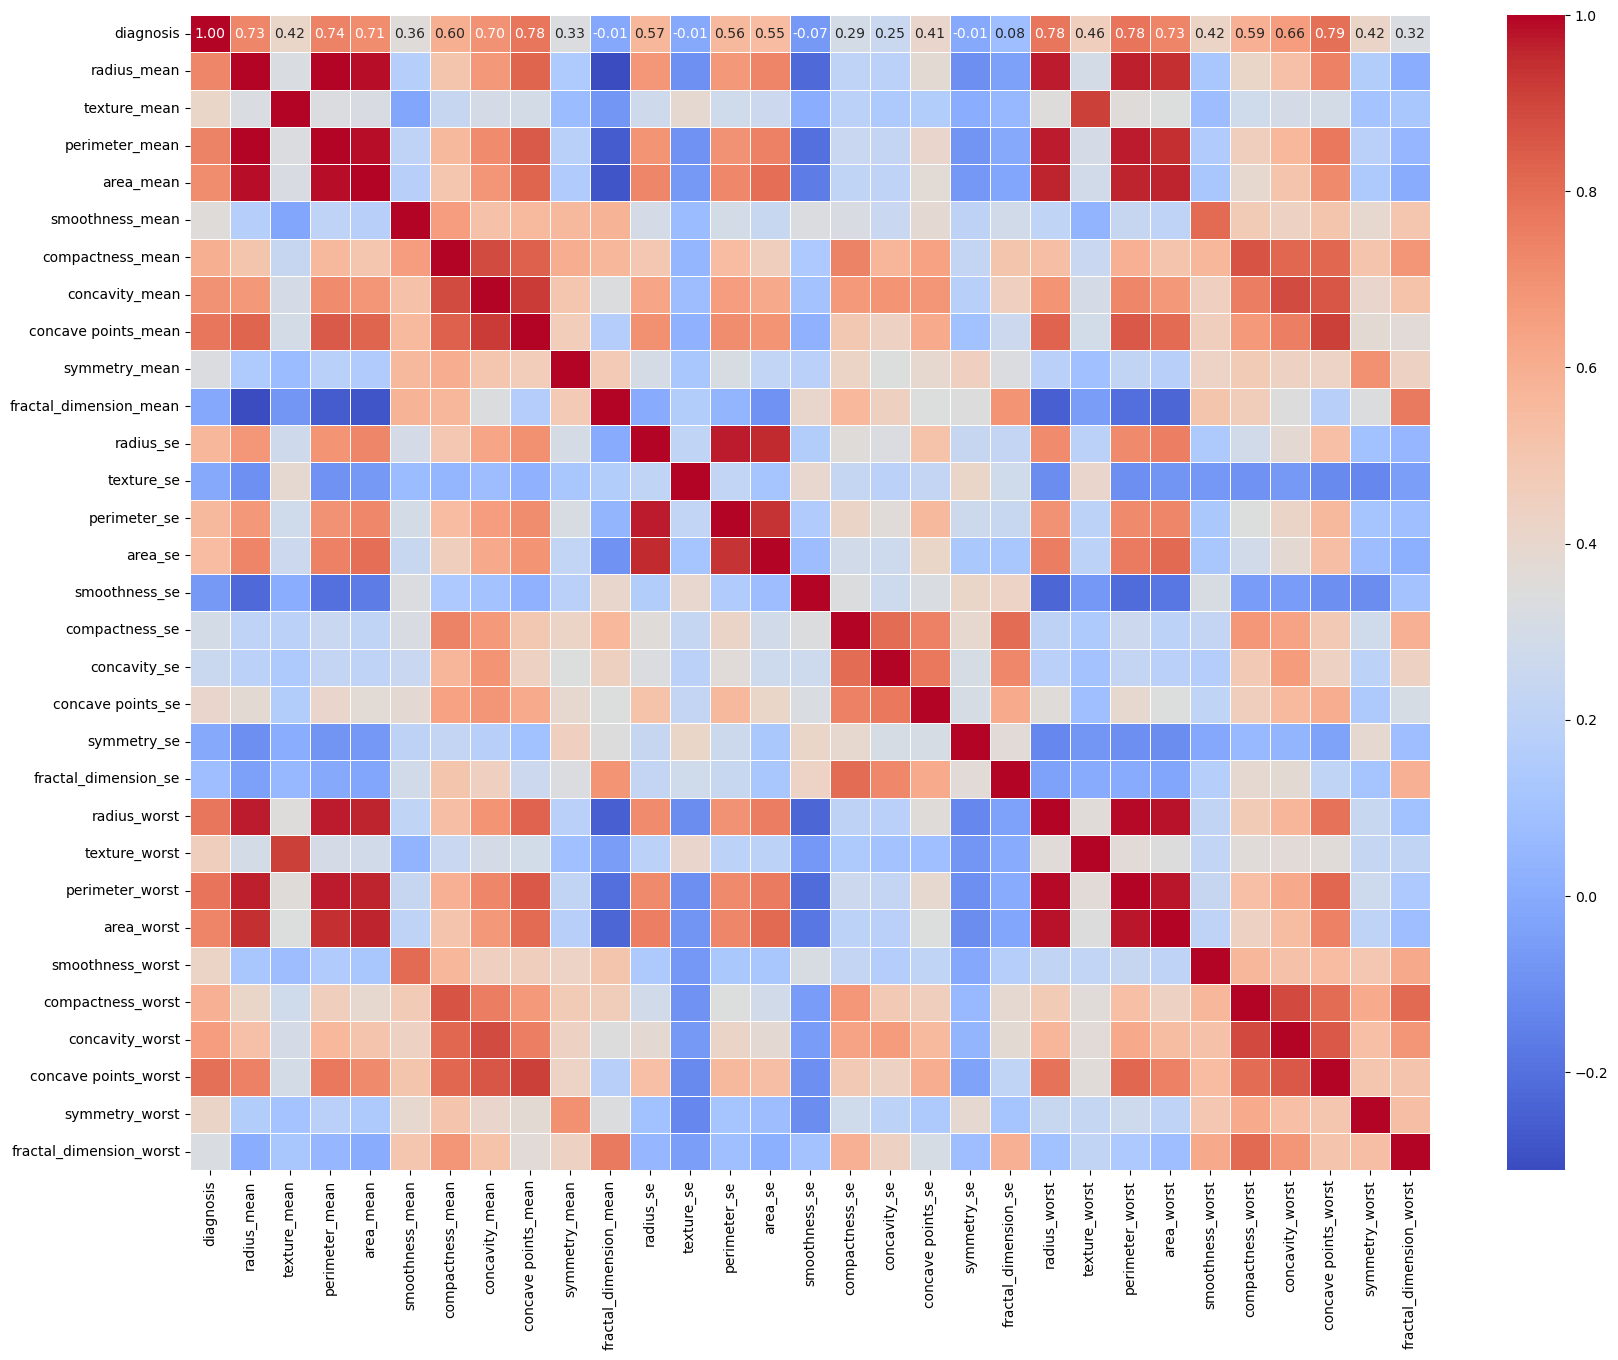

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Matrice de corrélation
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

- we observe that we have 5 columns with low correlation with diagnosis 
- so they could be removed for better effecieny with Logistic regression (because it is linear model)

In [84]:
columns = ['fractal_dimension_mean','texture_se', 'smoothness_se','symmetry_se', 'fractal_dimension_se'] 
df_optimal_LR = df.drop(columns=columns)
df_optimal_LR.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## Question 3 et 4 et 5

### Construction, Entraînement, Optimisation et Évaluation des Modèles
---

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


def split_train_evaluate_logistic_regression(df, test_size, random_state):
    X = df.drop('diagnosis', axis=1)
    y = df.iloc[:,0]
    # print(X.columns)
    # print(y)
    
    print("####################################################################")
    # splitting 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # defining LR model
    model = LogisticRegression(solver='liblinear', max_iter=1000, C=100)

    # training the model
    model.fit(X_train, y_train)

    # predictions
    y_pred = model.predict(X_test)

    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print("####################################################################")
    print(f'Confusion Matrix:\n{conf_matrix}')
    print("####################################################################")
    print(f'Classification Report:\n{class_report}')

In [86]:
split_train_evaluate_logistic_regression(df, 0.30, 42)

####################################################################
Accuracy: 0.9707602339181286
Precision: 0.953125
Recall: 0.9682539682539683
F1 Score: 0.9606299212598425
####################################################################
Confusion Matrix:
[[105   3]
 [  2  61]]
####################################################################
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [87]:
split_train_evaluate_logistic_regression(df_optimal_LR, 0.30, 42)

####################################################################
Accuracy: 0.9824561403508771
Precision: 0.96875
Recall: 0.9841269841269841
F1 Score: 0.9763779527559056
####################################################################
Confusion Matrix:
[[106   2]
 [  1  62]]
####################################################################
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [33]:
from sklearn.tree import DecisionTreeClassifier

def split_train_evaluate_decision_tree(df, test_size, random_state):
    X = df.drop('diagnosis', axis=1)
    y = df.iloc[:,0]
    
    print("####################################################################")
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Defining the Decision Tree model
    model = DecisionTreeClassifier(criterion='entropy')

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Computing evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Printing evaluation metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print("####################################################################")
    print(f'Confusion Matrix:\n{conf_matrix}')
    print("####################################################################")
    print(f'Classification Report:\n{class_report}')

In [88]:
split_train_evaluate_decision_tree(df, 0.25, 38)

####################################################################
Accuracy: 0.965034965034965
Precision: 0.9375
Recall: 0.9574468085106383
F1 Score: 0.9473684210526315
####################################################################
Confusion Matrix:
[[93  3]
 [ 2 45]]
####################################################################
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        96
           1       0.94      0.96      0.95        47

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [35]:
from sklearn.ensemble import RandomForestClassifier

def split_train_evaluate_random_forest(df, test_size, random_state):
    X = df.drop('diagnosis', axis=1)
    y = df.iloc[:,0]
    
    print("####################################################################")
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Defining the Random Forest model
    model = RandomForestClassifier() # gini and entropy gave similar results 

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Computing evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Printing evaluation metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print("####################################################################")
    print(f'Confusion Matrix:\n{conf_matrix}')
    print("####################################################################")
    print(f'Classification Report:\n{class_report}')

In [55]:
split_train_evaluate_random_forest(df, 0.25, 38)

####################################################################
Accuracy: 0.993006993006993
Precision: 1.0
Recall: 0.9787234042553191
F1 Score: 0.989247311827957
####################################################################
Confusion Matrix:
[[96  0]
 [ 1 46]]
####################################################################
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.98      0.99        47

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [38]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,20):
    print(i)
    scores = cross_val_score(KNeighborsClassifier(i), df.iloc[:, 1:], df.iloc[:,0], cv=5, scoring='accuracy')
    print(f"\n\tScores = {scores} \n\tMean = {scores.mean()}")

1

	Scores = [0.85964912 0.92982456 0.9122807  0.9122807  0.91150442] 
	Mean = 0.9051079024996118
2

	Scores = [0.87719298 0.92105263 0.92982456 0.92982456 0.88495575] 
	Mean = 0.9085700978108988
3

	Scores = [0.87719298 0.92105263 0.94736842 0.93859649 0.91150442] 
	Mean = 0.9191429902189101
4

	Scores = [0.87719298 0.92105263 0.93859649 0.94736842 0.92920354] 
	Mean = 0.9226828132277596
5

	Scores = [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354] 
	Mean = 0.9279459711224964
6

	Scores = [0.86842105 0.92982456 0.94736842 0.93859649 0.92035398] 
	Mean = 0.9209129017233348
7

	Scores = [0.87719298 0.93859649 0.94736842 0.94736842 0.92035398] 
	Mean = 0.9261760596180716
8

	Scores = [0.86842105 0.93859649 0.93859649 0.95614035 0.92920354] 
	Mean = 0.9261915851575843
9

	Scores = [0.87719298 0.93859649 0.94736842 0.95614035 0.9380531 ] 
	Mean = 0.9314702685918336
10

	Scores = [0.86842105 0.93859649 0.94736842 0.94736842 0.92920354] 
	Mean = 0.9261915851575843
11

	Scores = [0.87

In [39]:
from sklearn.neighbors import KNeighborsClassifier

def split_train_evaluate_knn(df, test_size, random_state):
    X = df.drop('diagnosis', axis=1)
    y = df.iloc[:,0]
    
    print("####################################################################")
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Defining the KNN model
    model = KNeighborsClassifier(14)

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Computing evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Printing evaluation metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print("####################################################################")
    print(f'Confusion Matrix:\n{conf_matrix}')
    print("####################################################################")
    print(f'Classification Report:\n{class_report}')

In [40]:
split_train_evaluate_knn(df, 0.25, 42)
split_train_evaluate_knn(df, 0.2, 42)

####################################################################
Accuracy: 0.972027972027972
Precision: 0.9807692307692307
Recall: 0.9444444444444444
F1 Score: 0.9622641509433962
####################################################################
Confusion Matrix:
[[88  1]
 [ 3 51]]
####################################################################
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

####################################################################
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9302325581395349
F1 Score: 0.963855421686747
####################################################################
Confusion Matrix:
[[71  0]
 [ 3 40]]
##################

In [41]:
from sklearn.svm import SVC

def split_train_evaluate_svm(df, test_size, random_state):
    X = df.drop('diagnosis', axis=1)
    y = df.iloc[:,0]
    
    print("####################################################################")
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Defining the SVM model
    model = SVC()

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Computing evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Printing evaluation metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print("####################################################################")
    print(f'Confusion Matrix:\n{conf_matrix}')
    print("####################################################################")
    print(f'Classification Report:\n{class_report}')

In [42]:
#split_train_evaluate_svm(df, 0.31, 41)
split_train_evaluate_svm(df_scaled, 0.31, 40)

####################################################################
Accuracy: 0.9887005649717514
Precision: 0.9830508474576272
Recall: 0.9830508474576272
F1 Score: 0.9830508474576272
####################################################################
Confusion Matrix:
[[117   1]
 [  1  58]]
####################################################################
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       118
           1       0.98      0.98      0.98        59

    accuracy                           0.99       177
   macro avg       0.99      0.99      0.99       177
weighted avg       0.99      0.99      0.99       177



In [43]:
from sklearn.svm import SVC

def get_SVM_model(df):
    X = df.drop('diagnosis', axis=1)
    y = df.iloc[:,0]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=31, random_state=40)

    # Defining the SVM model
    model = SVC()

    # Training the model
    model.fit(X_train, y_train)

    return model

In [44]:
import joblib  

svm_model = get_SVM_model(df_scaled)
 
filename = 'model.pkl'

# Enregistrer le modèle dans le fichier .pkl
joblib.dump(svm_model, filename)

print(f"Modèle enregistré avec succès dans '{filename}'") # Affiche un message indiquant que le modèle a été enregistré avec succès


Modèle enregistré avec succès dans 'model.pkl'
